Epoch 1/100


C:\Users\mjaha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2280 - val_loss: 0.0572
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0515 - val_loss: 0.0328
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0298 - val_loss: 0.0160
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0145 - val_loss: 0.0082
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0076 - val_loss: 0.0051
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0052 - val_loss: 0.0037
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0038 - val_loss: 0.0029
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0018 - val_loss: 0.0014
Epoch 12/100
100/100 ━━━━━━━━━━━━

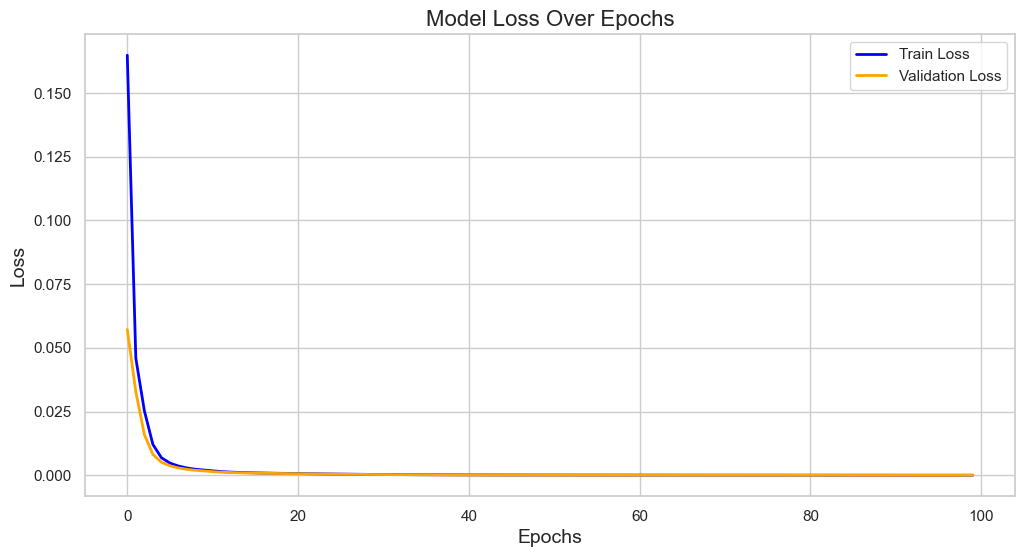

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 3.0904e-05
Test Loss: 2.9680068109882995e-05
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


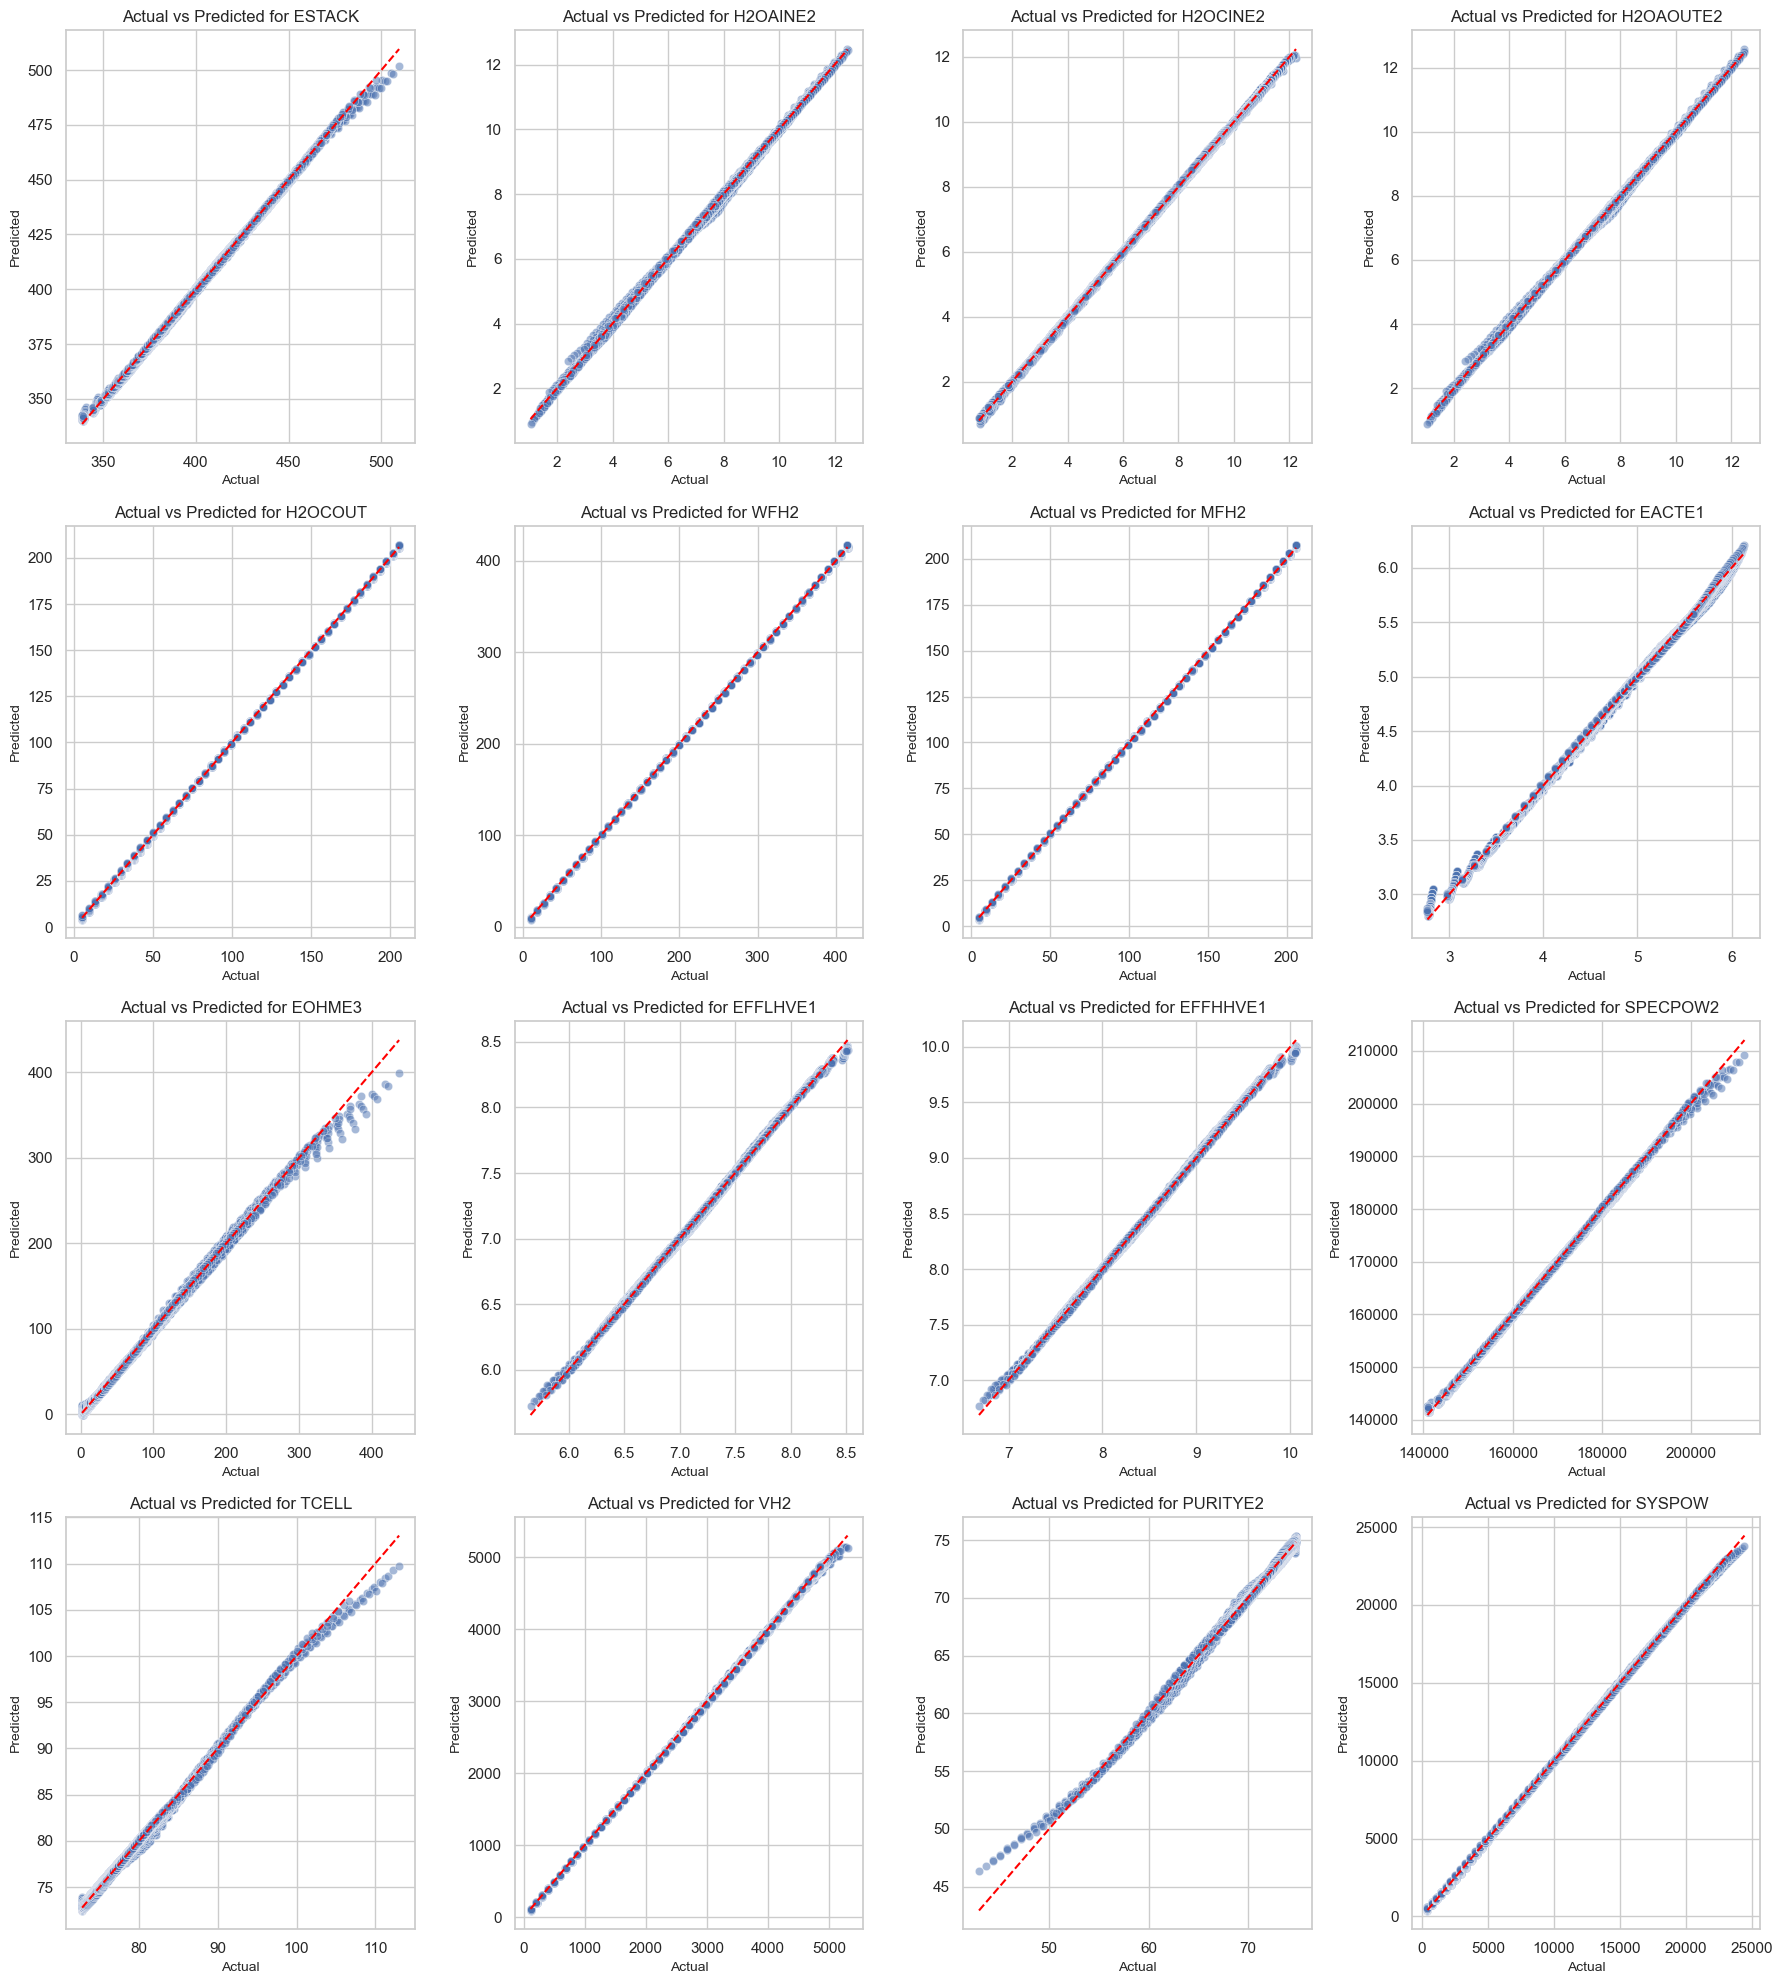

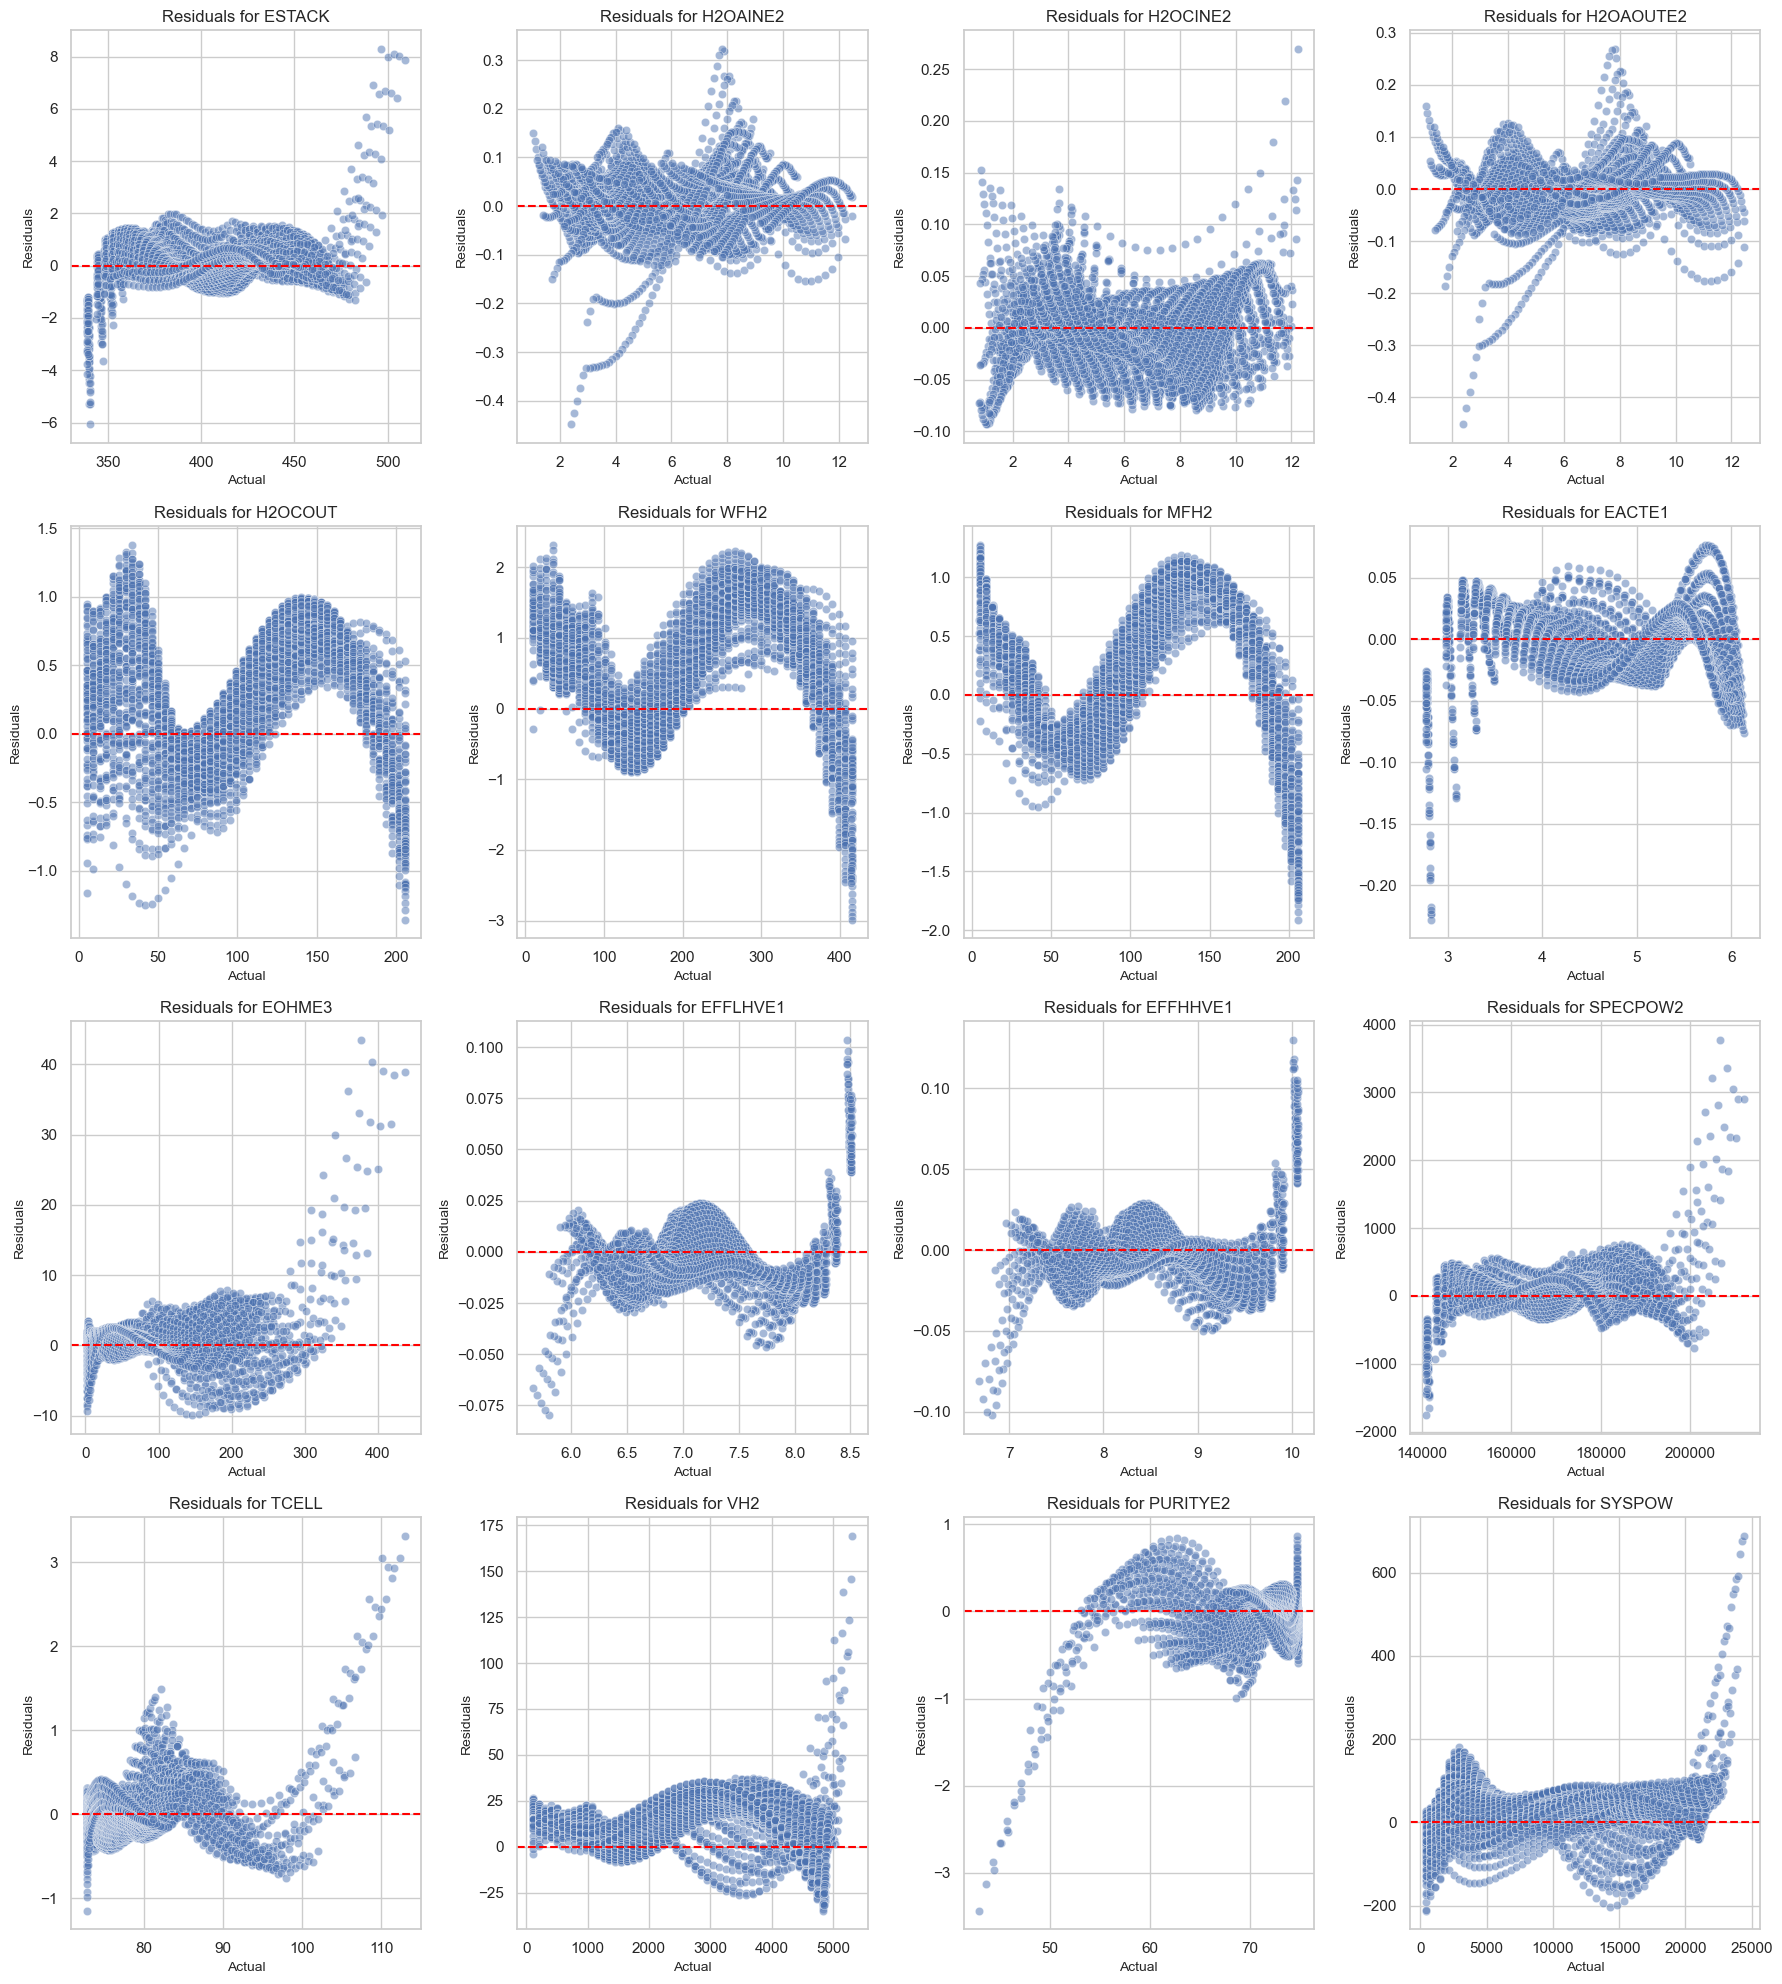

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


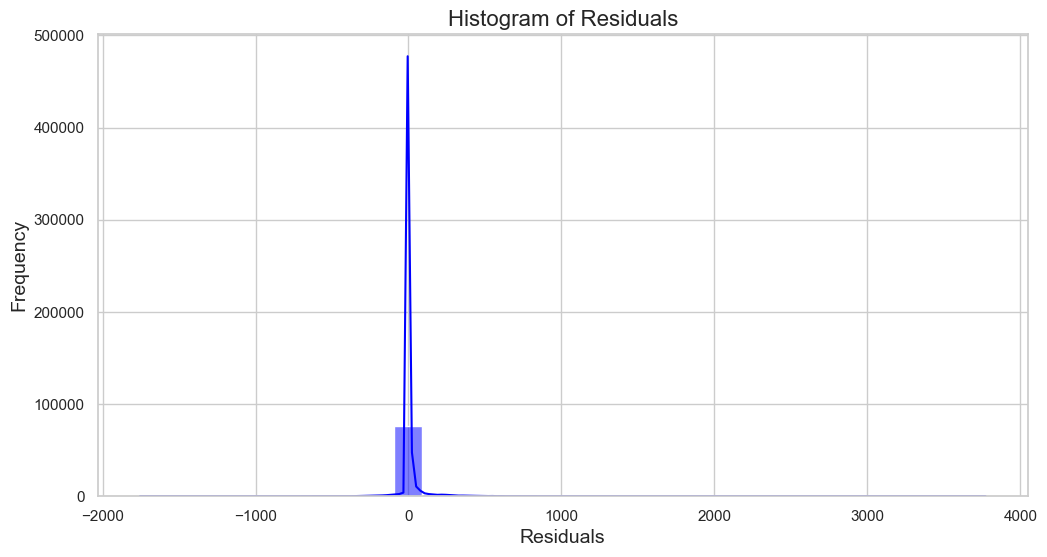

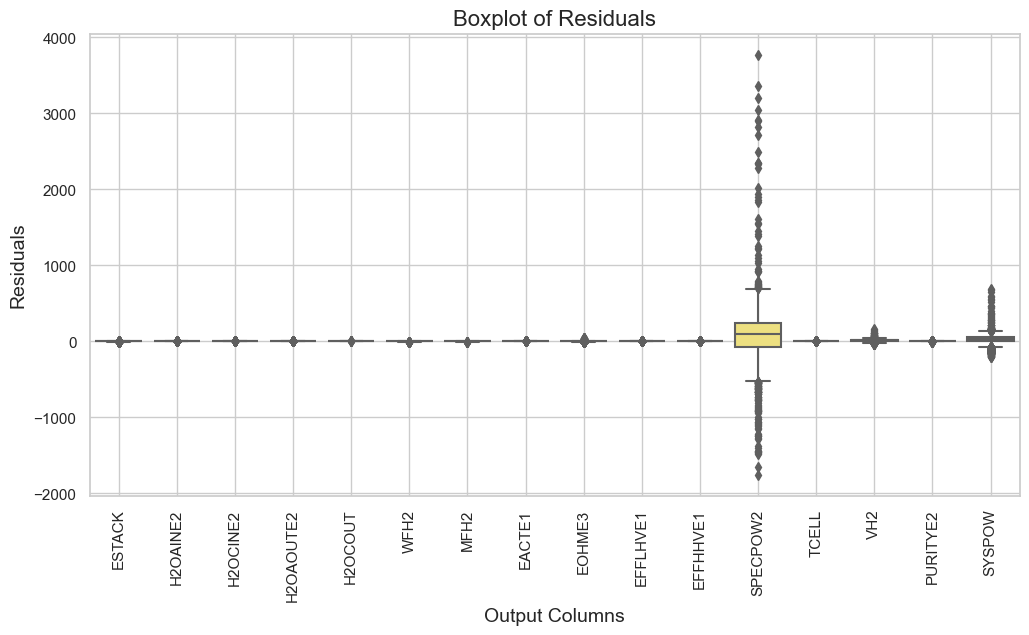

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Step 1: Load and Prepare the Data
data = pd.read_csv('full result clean.csv')
data.columns = data.columns.str.strip()

# Define input and output columns
input_columns = ['V1', 'V2', 'V3E4']
output_columns = ['ESTACK', 'H2OAINE2', 'H2OCINE2', 'H2OAOUTE2',
                  'H2OCOUT', 'WFH2', 'MFH2', 'EACTE1', 'EOHME3', 'EFFLHVE1', 'EFFHHVE1',
                  'SPECPOW2', 'TCELL', 'VH2', 'PURITYE2', 'SYSPOW']

# Check if all specified columns are in the DataFrame
missing_input_cols = [col for col in input_columns if col not in data.columns]
missing_output_cols = [col for col in output_columns if col not in data.columns]

if missing_input_cols:
    raise KeyError(f"Input columns missing from the dataset: {missing_input_cols}")
if missing_output_cols:
    raise KeyError(f"Output columns missing from the dataset: {missing_output_cols}")

# Extract input features and output targets
X = data[input_columns].values
y = data[output_columns].values

# Normalize the data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Reshape input data to 3D for LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 2: Define the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(len(output_columns)))

# Step 3: Compile and Train the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 4: Plotting

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Predicting and inverse scaling for real values if needed
y_pred = model.predict(X_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Calculate residuals
residuals = y - y_pred_rescaled

# Plot actual vs predicted for all outputs with 45-degree line
num_output_cols = len(output_columns)
num_plots_per_row = 4  # Number of plots to show per row
num_rows = int(np.ceil(num_output_cols / num_plots_per_row))

plt.figure(figsize=(18, 5 * num_rows))

for i, col in enumerate(output_columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    sns.scatterplot(x=y[:, i], y=y_pred_rescaled[:, i], alpha=0.5)
    plt.plot([min(y[:, i]), max(y[:, i])], [min(y[:, i]), max(y[:, i])], color='red', linestyle='--')  # 45-degree line
    plt.title(f'Actual vs Predicted for {col}', fontsize=12)
    plt.xlabel('Actual', fontsize=10)
    plt.ylabel('Predicted', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot scatter plot of residuals for all outputs
plt.figure(figsize=(18, 5 * num_rows))

for i, col in enumerate(output_columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    sns.scatterplot(x=y[:, i], y=residuals[:, i], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals for {col}', fontsize=12)
    plt.xlabel('Actual', fontsize=10)
    plt.ylabel('Residuals', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals.flatten(), bins=30, kde=True, color='blue')
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plot boxplot of residuals for all outputs
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(residuals, columns=output_columns), palette="Set3")
plt.title('Boxplot of Residuals', fontsize=16)
plt.xlabel('Output Columns', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
